<a href="https://colab.research.google.com/github/seymaazehra/TrafficSignsDetection-Classifier/blob/main/TrafficSigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
np.random.seed(0)

In [ ]:
with open('/gdrive/My Drive/TrafficSignsDetection/german-traffic-signs/train.p','rb') as f:
  train_data=pickle.load(f)
with open('/gdrive/My Drive/TrafficSignsDetection/german-traffic-signs/valid.p','rb') as f:
  val_data=pickle.load(f)
with open('/gdrive/My Drive/TrafficSignsDetection/german-traffic-signs/test.p', 'rb') as f:
  test_data=pickle.load(f)
X_train,y_train=train_data['features'], train_data['labels']
X_val, y_val=val_data['features'], val_data['labels']
X_test, y_test=test_data['features'], test_data['labels']

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0]==y_train.shape[0]) 
assert(X_val.shape[0]==y_val.shape[0]) 
assert(X_test.shape[0]==y_test.shape[0]) 
assert(X_train.shape[1:]==(32,32,3)) 
assert(X_train.shape[1:]==(32,32,3)) 
assert(X_val.shape[1:]==(32,32,3)) 

In [ ]:
data=pd.read_csv('/gdrive/My Drive/TrafficSignsDetection/german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

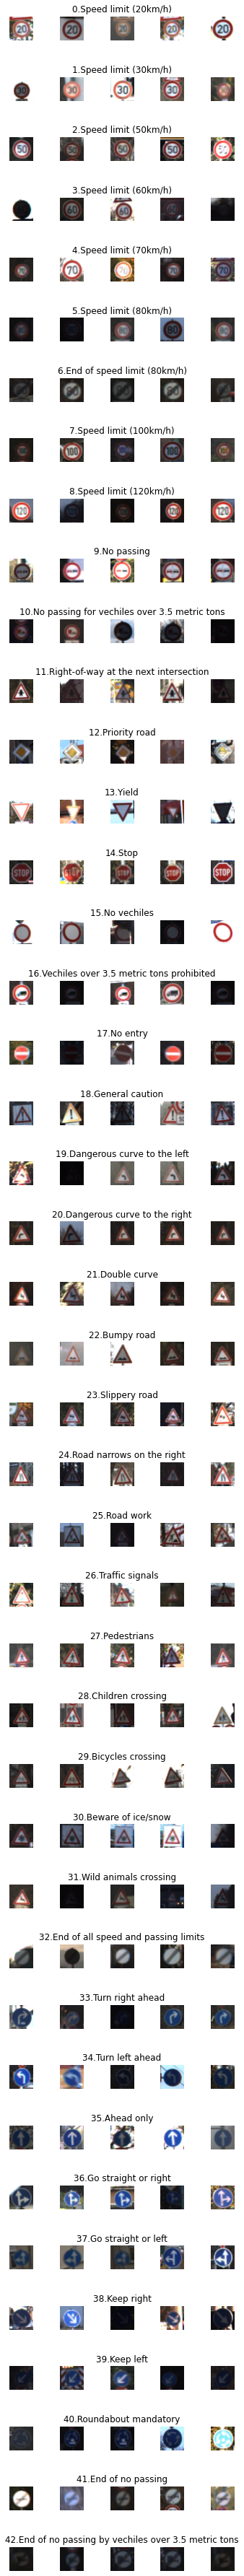

In [ ]:

num_of_samples=[]
cols=5
num_classes=43

fig,axs=plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
      x_selected=X_train[y_train==j]
    
      axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)),:,:], cmap=plt.get_cmap("gray"))
      

      axs[j][i].axis("off")

          
      if i==2:
          axs[j][i].set_title(str(j) + "." + row['SignName'])
          num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

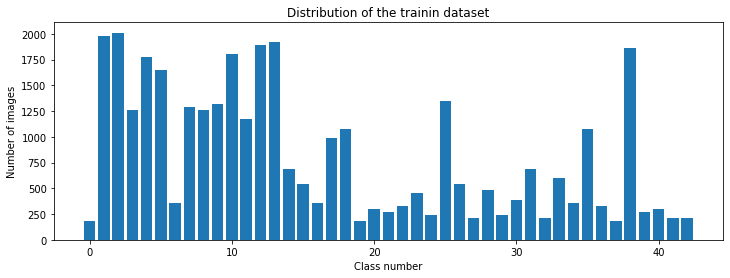

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the trainin dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


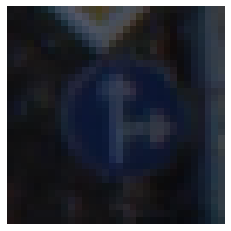

In [ ]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


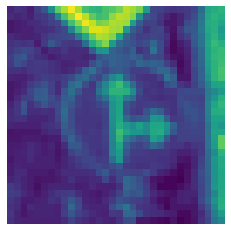

In [ ]:
def grayscale(img):
  img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return img

img=grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

(32, 32)


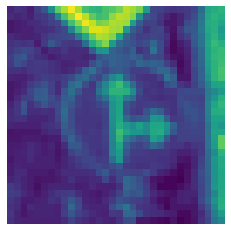

In [ ]:
def equalize(img):
  cv2.equalizeHist(img)
  return img
img=equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [ ]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))


In [ ]:
#plt.imshow(X_train[random.randint(0,len[X_train]-1)]
#plt.axis("off")
#print(X_train.shape)

In [ ]:
X_train = X_train.reshape((34799, 32, 32, 1))
X_val = X_val.reshape((4410, 32, 32, 1))
X_test = X_test.reshape((12630, 32 ,32 ,1))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
datagen.fit(X_train)

(15, 32, 32, 1)


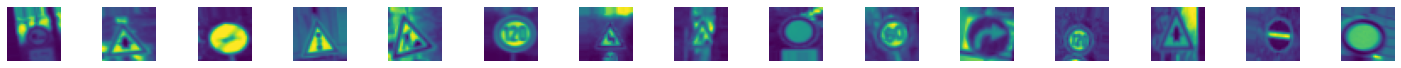

In [ ]:
batches = datagen.flow(X_train, y_train, batch_size=15)
X_batch ,y_batch = next(batches)

fig, axs=plt.subplots(1, 15, figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis("off")
print(X_batch.shape)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val, 43)

In [ ]:
def modified_model():
  model=Sequential()
  model.add(Conv2D(60, (5,5), input_shape=(32,32,1) , activation="relu"))
  model.add(Conv2D(60, (5,5) ,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30,(3,3), activation='relu'))
  model.add(Conv2D(30, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  # model.add(Dropout(0,5))
  model.add(Dense(0,5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint


# Set Model
model=Sequential()
model.add(Conv2D(60, (5,5), input_shape=(32,32,1) , activation="relu"))
model.add(Conv2D(60, (5,5) ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(30,(3,3), activation='relu'))
model.add(Conv2D(30, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


# Compile model

model.compile(Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)

#training_generator = datagen.flow(X_train, y_train, batch_size=64,subset='training',seed=7)
#training_generator2=datagen.flow(X_train, y_train, batch_size=64,subset='training',seed=7)
#validation_generator = datagen.flow(X_train, y_train, batch_size=64,subset='validation',seed=7)
#validation_generator2 = datagen.flow(X_train, y_train, batch_size=64,subset='validation',seed=7)




In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=200, epochs=10, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/10
200/200 [==============================] - 128s 636ms/step - loss: 3.4738 - accuracy: 0.0743 - val_loss: 3.3737 - val_accuracy: 0.1011
Epoch 2/10
200/200 [==============================] - 123s 616ms/step - loss: 2.7128 - accuracy: 0.2687 - val_loss: 1.6363 - val_accuracy: 0.5685
Epoch 3/10
200/200 [==============================] - 126s 628ms/step - loss: 1.7407 - accuracy: 0.4921 - val_loss: 0.9010 - val_accuracy: 0.7399
Epoch 4/10
200/200 [==============================] - 128s 642ms/step - loss: 1.3120 - accuracy: 0.6137 - val_loss: 0.6487 - val_accuracy: 0.8161
Epoch 5/10
200/200 [==============================] - 135s 677ms/step - loss: 1.0327 - accuracy: 0.6898 - val_loss: 0.5381 - val_accuracy: 0.8395
Epoch 6/10
200/200 [==============================] - 127s 634ms/step - loss: 0.8710 - accuracy: 0.7357 - val_loss: 0.4418 - val_accuracy: 0.8676
Epoch 7/10
200/200 [==============================] - 126s 631ms/step - loss: 0.7572 - accuracy: 0.7729 - val_loss: 0.3883 -

Text(0.5, 0, 'epochs')

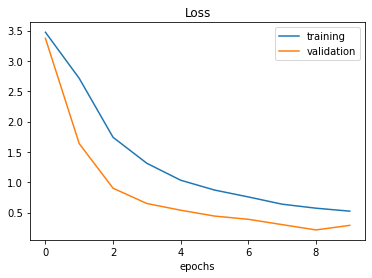

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

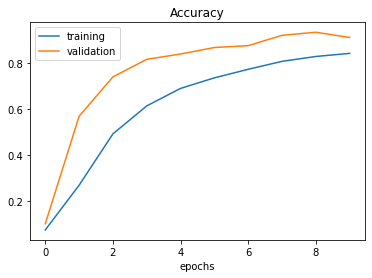

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epochs')         

In [ ]:
score=model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy:', score[1])

Test Accuracy: 0.9197149872779846


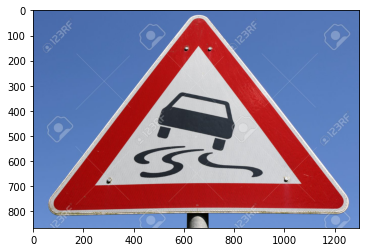

In [ ]:
import requests
from PIL import Image
url='https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r=requests.get(url, stream=True)
img=Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


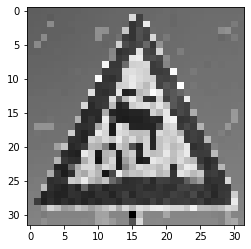

In [ ]:
img= np.asarray(img)
img= cv2.resize(img,(32,32))
img=preprocessing(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
print(img.shape)

In [ ]:
img= img.reshape(1,32,32,1)

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)



y_predict = np.argmax(model.predict(img), axis=-1)

print("predicted sign: " , y_predict)


1/1 [==============================] - 0s 25ms/step
predicted sign:  [23]
